In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [18]:
marketing = pd.read_csv("marketing_numerical.csv")
(marketing.columns.values)

array(['Sex', ' MaritalStatus', ' Age', ' Education', ' Occupation',
       ' YearsInSf', ' DualIncome', ' HouseholdMembers', ' Under18',
       ' HouseholdStatus', ' TypeOfHome', ' EthnicClass', ' Language',
       'Class'], dtype=object)

In [19]:
marketing

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Class
0,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0,9
1,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0,9
2,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0,1
3,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0,1
4,1,1.0,6,4.0,8.0,5.0,3,2.0,0,1.0,1.0,7.0,1.0,8
5,1,5.0,2,3.0,9.0,4.0,1,3.0,1,2.0,3.0,7.0,1.0,1
6,1,3.0,3,4.0,3.0,5.0,1,1.0,0,2.0,3.0,7.0,1.0,6
7,1,1.0,6,3.0,8.0,5.0,3,3.0,0,2.0,3.0,7.0,1.0,2
8,1,1.0,7,4.0,8.0,4.0,3,2.0,0,2.0,3.0,7.0,1.0,4
9,1,5.0,2,4.0,9.0,5.0,1,1.0,0,2.0,3.0,7.0,1.0,1


In [20]:
i = 100
j = 0
features = ['Sex', ' MaritalStatus', ' Age', ' Education', ' Occupation',
       ' YearsInSf', ' DualIncome', ' HouseholdMembers', ' Under18',
       ' HouseholdStatus', ' TypeOfHome', ' EthnicClass', ' Language']
for index, m in marketing.iterrows():
    if index % 20 == 0:
        marketing.at[index+2,features[j]] = i + 1
        j += 3
        i += 10
        if j >= 12:
            j = 0

In [21]:
i = 0
j = 0
for index, m in marketing.iterrows():
    if index % 20 == 0:
        if index < 6870:
            marketing.at[index+5,:] = marketing.loc[j,:]
        else:
            marketing.at[index+1,:] = marketing.loc[j,:]
        j += 120
        if j >= 6500:
            j = 0

In [23]:
marketing.to_csv('/home/valia/Documents/AppliedDataScience/marketingNoise.csv', sep=',')

In [30]:
data = marketing.iloc[:,0:13]
labels = marketing.iloc[:,13].apply(str)
labels.unique()


array(['9.0', '1.0', '8.0', '6.0', '2.0', '4.0', '7.0', '5.0', '3.0'],
      dtype=object)

In [31]:
kf = KFold(n_splits=2, shuffle=True) #5 times with 2 folds

### Euclidean and k tuning on 10% noise datasets

In [32]:
acc = []
mean_accuracy_model_euclidean = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

         5.0       0.59      0.62      0.61       606
         8.0       0.17      0.16      0.16       253
         1.0       0.19      0.16      0.17       242
         4.0       0.14      0.15      0.14       287
         7.0       0.18      0.17      0.18       276
         3.0       0.29      0.29      0.29       451
         6.0       0.22      0.22      0.22       405
         2.0       0.30      0.32      0.31       541
         9.0       0.35      0.36      0.36       377

   micro avg       0.31      0.31      0.31      3438
   macro avg       0.27      0.27      0.27      3438
weighted avg       0.31      0.31      0.31      3438

accuracy:  0.31151832460732987
              precision    recall  f1-score   support

         5.0       0.66      0.57      0.61       638
         8.0       0.18      0.19      0.19       260
         1.0       0.15      0.15      0.15       244
         4.0       0.17      0.18      0.17    

In [33]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model2 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model2

              precision    recall  f1-score   support

         5.0       0.49      0.74      0.59       610
         8.0       0.18      0.19      0.18       253
         1.0       0.16      0.12      0.14       258
         4.0       0.15      0.14      0.14       287
         7.0       0.17      0.13      0.15       273
         3.0       0.24      0.25      0.25       415
         6.0       0.24      0.18      0.21       421
         2.0       0.33      0.37      0.35       549
         9.0       0.40      0.29      0.33       372

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.26      0.27      0.26      3438
weighted avg       0.29      0.32      0.30      3438

accuracy:  0.3170447934845841
              precision    recall  f1-score   support

         5.0       0.54      0.72      0.62       634
         8.0       0.17      0.14      0.15       260
         1.0       0.15      0.18      0.16       228
         4.0       0.19      0.18      0.18     

In [34]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model3 = sum(acc)/10 
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model3

              precision    recall  f1-score   support

         5.0       0.53      0.73      0.61       615
         8.0       0.19      0.13      0.16       260
         1.0       0.14      0.17      0.15       216
         4.0       0.19      0.14      0.16       295
         7.0       0.16      0.15      0.16       252
         3.0       0.23      0.26      0.24       427
         6.0       0.24      0.18      0.20       394
         2.0       0.39      0.37      0.38       592
         9.0       0.42      0.39      0.40       387

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.28      0.28      0.27      3438
weighted avg       0.31      0.33      0.32      3438

accuracy:  0.3333333333333333
              precision    recall  f1-score   support

         5.0       0.50      0.74      0.60       629
         8.0       0.17      0.15      0.16       253
         1.0       0.17      0.11      0.13       270
         4.0       0.21      0.17      0.19     

In [35]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model4 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model4

              precision    recall  f1-score   support

         5.0       0.51      0.75      0.61       619
         8.0       0.14      0.10      0.12       276
         1.0       0.21      0.12      0.16       258
         4.0       0.18      0.17      0.17       293
         7.0       0.19      0.14      0.16       253
         3.0       0.23      0.25      0.24       423
         6.0       0.19      0.13      0.15       398
         2.0       0.29      0.40      0.34       536
         9.0       0.40      0.29      0.33       382

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.26      0.26      0.25      3438
weighted avg       0.29      0.32      0.29      3438

accuracy:  0.3170447934845841
              precision    recall  f1-score   support

         5.0       0.52      0.77      0.62       625
         8.0       0.15      0.15      0.15       237
         1.0       0.13      0.11      0.12       228
         4.0       0.13      0.08      0.10     

In [36]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model5 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model5

              precision    recall  f1-score   support

         5.0       0.52      0.77      0.62       640
         8.0       0.17      0.12      0.14       249
         1.0       0.14      0.09      0.11       243
         4.0       0.20      0.19      0.20       284
         7.0       0.18      0.10      0.13       276
         3.0       0.22      0.23      0.23       433
         6.0       0.23      0.16      0.19       388
         2.0       0.32      0.42      0.36       548
         9.0       0.41      0.33      0.36       377

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.27      0.27      0.26      3438
weighted avg       0.30      0.33      0.31      3438

accuracy:  0.3307155322862129
              precision    recall  f1-score   support

         5.0       0.51      0.74      0.60       604
         8.0       0.16      0.11      0.13       264
         1.0       0.14      0.07      0.10       243
         4.0       0.19      0.14      0.16     

In [37]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model6 = sum(acc)/10
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model6

              precision    recall  f1-score   support

         5.0       0.49      0.80      0.61       610
         8.0       0.17      0.12      0.14       260
         1.0       0.16      0.08      0.10       237
         4.0       0.16      0.10      0.12       310
         7.0       0.11      0.07      0.09       241
         3.0       0.20      0.25      0.22       424
         6.0       0.22      0.13      0.16       413
         2.0       0.32      0.42      0.36       563
         9.0       0.42      0.36      0.39       380

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.25      0.26      0.24      3438
weighted avg       0.28      0.32      0.29      3438

accuracy:  0.32257126236183825
              precision    recall  f1-score   support

         5.0       0.50      0.78      0.61       634
         8.0       0.20      0.13      0.15       253
         1.0       0.23      0.10      0.14       249
         4.0       0.18      0.19      0.19    

In [38]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model7 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model7

              precision    recall  f1-score   support

         5.0       0.53      0.80      0.64       650
         8.0       0.17      0.10      0.13       244
         1.0       0.19      0.11      0.14       236
         4.0       0.19      0.16      0.17       296
         7.0       0.10      0.06      0.07       254
         3.0       0.22      0.24      0.23       438
         6.0       0.17      0.10      0.13       392
         2.0       0.33      0.47      0.39       543
         9.0       0.42      0.30      0.35       385

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.26      0.26      0.25      3438
weighted avg       0.29      0.33      0.30      3438

accuracy:  0.3344968004653869
              precision    recall  f1-score   support

         5.0       0.47      0.82      0.59       594
         8.0       0.16      0.07      0.09       269
         1.0       0.22      0.07      0.10       250
         4.0       0.22      0.14      0.17     

In [39]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model8 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model8

              precision    recall  f1-score   support

         5.0       0.50      0.81      0.62       628
         8.0       0.14      0.04      0.06       253
         1.0       0.26      0.04      0.07       224
         4.0       0.22      0.17      0.19       310
         7.0       0.17      0.03      0.06       261
         3.0       0.23      0.28      0.25       434
         6.0       0.17      0.07      0.10       400
         2.0       0.29      0.61      0.39       533
         9.0       0.50      0.25      0.33       395

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.28      0.26      0.23      3438
weighted avg       0.30      0.34      0.29      3438

accuracy:  0.337696335078534
              precision    recall  f1-score   support

         5.0       0.47      0.83      0.60       616
         8.0       0.16      0.03      0.05       260
         1.0       0.22      0.04      0.07       262
         4.0       0.18      0.10      0.13      

In [40]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model9 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model9

              precision    recall  f1-score   support

         5.0       0.50      0.81      0.62       641
         8.0       0.16      0.03      0.05       254
         1.0       0.21      0.03      0.05       248
         4.0       0.20      0.20      0.20       316
         7.0       0.14      0.02      0.03       255
         3.0       0.22      0.27      0.25       437
         6.0       0.19      0.07      0.11       380
         2.0       0.27      0.53      0.36       539
         9.0       0.37      0.24      0.29       368

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.25      0.24      0.22      3438
weighted avg       0.28      0.33      0.27      3438

accuracy:  0.3263525305410122
              precision    recall  f1-score   support

         5.0       0.47      0.83      0.60       603
         8.0       0.25      0.01      0.02       259
         1.0       0.29      0.03      0.05       238
         4.0       0.17      0.15      0.16     

[0.31064572425828973, 0.32739965095986034, 0.3321989528795811, 0.33327515997673063, 0.33152995927865037, 0.32678883071553233, 0.3297556719022688, 0.3262943571844096, 0.32324025596276906]


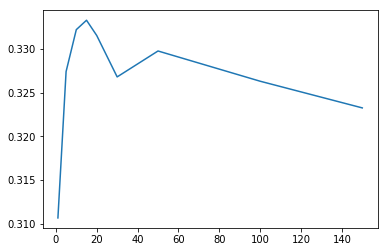

In [41]:
print mean_accuracy_model_euclidean
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()

### Minkowski and k tuning on 10% noise dataset

In [42]:
acc = []
mean_accuracy_model_minkowski = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model10 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model10

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.63      0.61      0.62       636
         8.0       0.19      0.16      0.17       261
         1.0       0.17      0.18      0.17       227
         4.0       0.16      0.17      0.16       301
         7.0       0.21      0.22      0.22       274
         3.0       0.27      0.24      0.25       445
         6.0       0.24      0.26      0.25       379
         2.0       0.33      0.37      0.35       539
         9.0       0.35      0.32      0.33       376

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.28      0.28      0.28      3438
weighted avg       0.32      0.32      0.32      3438

accuracy:  0.3222803955788249
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.60      0.59      0.59       608
         8.0      

In [43]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model11 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model11

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.51      0.74      0.60       632
         8.0       0.17      0.18      0.17       259
         1.0       0.16      0.13      0.14       245
         4.0       0.16      0.16      0.16       297
         7.0       0.21      0.15      0.17       267
         3.0       0.23      0.23      0.23       421
         6.0       0.26      0.21      0.23       384
         2.0       0.35      0.36      0.35       561
         9.0       0.43      0.29      0.35       372

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.28      0.27      0.27      3438
weighted avg       0.31      0.33      0.31      3438

accuracy:  0.32577079697498545
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.50      0.75      0.60       612
         8.0     

In [44]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model12 = sum(acc)/10 
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model12

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.53      0.78      0.64       636
         8.0       0.23      0.21      0.22       244
         1.0       0.18      0.14      0.16       229
         4.0       0.22      0.13      0.17       315
         7.0       0.20      0.16      0.18       258
         3.0       0.27      0.26      0.27       443
         6.0       0.24      0.18      0.20       405
         2.0       0.32      0.40      0.35       535
         9.0       0.40      0.34      0.37       373

   micro avg       0.35      0.35      0.35      3438
   macro avg       0.29      0.29      0.28      3438
weighted avg       0.32      0.35      0.33      3438

accuracy:  0.34642233856893545
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.51      0.70      0.59       608
         8.0     

In [45]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model11 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model11

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.52      0.75      0.61       619
         8.0       0.14      0.17      0.16       232
         1.0       0.20      0.10      0.13       259
         4.0       0.19      0.15      0.17       304
         7.0       0.29      0.15      0.20       273
         3.0       0.24      0.28      0.26       435
         6.0       0.25      0.15      0.18       425
         2.0       0.30      0.43      0.36       529
         9.0       0.38      0.27      0.31       362

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.28      0.27      0.26      3438
weighted avg       0.31      0.33      0.31      3438

accuracy:  0.3275159976730657
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.50      0.75      0.60       625
         8.0      

In [46]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model13 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model13

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.49      0.74      0.59       620
         8.0       0.18      0.13      0.15       262
         1.0       0.16      0.08      0.11       243
         4.0       0.20      0.14      0.17       310
         7.0       0.22      0.09      0.13       285
         3.0       0.22      0.27      0.24       427
         6.0       0.20      0.16      0.18       414
         2.0       0.34      0.42      0.37       541
         9.0       0.37      0.36      0.37       336

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.26      0.27      0.26      3438
weighted avg       0.29      0.32      0.30      3438

accuracy:  0.3228621291448517
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.52      0.79      0.62       624
         8.0      

In [47]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model14 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model14

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.54      0.77      0.63       650
         8.0       0.20      0.14      0.16       255
         1.0       0.25      0.09      0.14       244
         4.0       0.25      0.21      0.23       289
         7.0       0.16      0.11      0.13       250
         3.0       0.20      0.26      0.22       421
         6.0       0.25      0.12      0.16       424
         2.0       0.29      0.47      0.36       519
         9.0       0.46      0.29      0.35       386

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.29      0.27      0.26      3438
weighted avg       0.32      0.34      0.31      3438

accuracy:  0.3371146015125073
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.48      0.79      0.60       594
         8.0      

In [48]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model15 = sum(acc)/10 
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model15

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.49      0.78      0.60       612
         8.0       0.17      0.11      0.13       253
         1.0       0.23      0.05      0.08       253
         4.0       0.24      0.21      0.22       302
         7.0       0.11      0.04      0.05       277
         3.0       0.20      0.24      0.22       435
         6.0       0.19      0.09      0.12       386
         2.0       0.28      0.44      0.34       551
         9.0       0.37      0.34      0.35       369

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.25      0.25      0.24      3438
weighted avg       0.28      0.32      0.28      3438

accuracy:  0.3193717277486911
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.51      0.83      0.63       632
         8.0      

In [49]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model16 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model16

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.50      0.83      0.63       610
         8.0       0.19      0.05      0.08       256
         1.0       0.24      0.07      0.11       237
         4.0       0.20      0.15      0.17       305
         7.0       0.15      0.04      0.06       250
         3.0       0.21      0.31      0.25       453
         6.0       0.18      0.07      0.10       398
         2.0       0.29      0.44      0.35       561
         9.0       0.39      0.35      0.37       368

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.26      0.26      0.23      3438
weighted avg       0.29      0.33      0.28      3438

accuracy:  0.3298429319371728
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.48      0.82      0.61       634
         8.0      

In [50]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model17 = sum(acc)/10
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model17

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.49      0.80      0.61       624
         8.0       0.07      0.02      0.03       244
         1.0       0.15      0.05      0.08       233
         4.0       0.26      0.14      0.18       308
         7.0       0.19      0.02      0.04       282
         3.0       0.21      0.33      0.26       421
         6.0       0.12      0.03      0.05       406
         2.0       0.27      0.55      0.37       541
         9.0       0.39      0.25      0.30       379

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.24      0.24      0.21      3438
weighted avg       0.27      0.32      0.27      3438

accuracy:  0.3219895287958115
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.50      0.82      0.62       620
         8.0      

[0.3116055846422338, 0.3286503781268179, 0.3303955788248982, 0.33025014543339154, 0.32838859802210596, 0.33161721931355437, 0.3319662594531704, 0.32687609075043633, 0.3264688772542176]


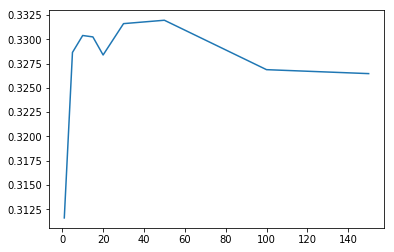

In [51]:
print mean_accuracy_model_minkowski
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
plt.show()

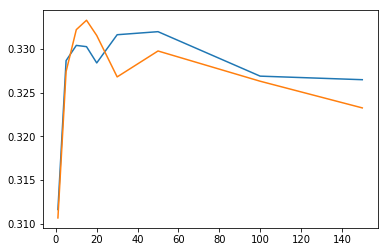

In [52]:
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()